# Optimizing Home Price Predictions in Ames Iowa

- Brandon Walraven

Our goal is to build a model that will accurately predict the market price for as many home owners as possible.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading in training and test data
df = pd.read_csv('./datasets/train.csv')
td = pd.read_csv('./datasets/test.csv')

# Data Cleaning

In [3]:
# renaming columns
df.columns = df.columns.map(lambda x: x.lower().replace(' ', '_'))
td.columns = td.columns.map(lambda x: x.lower().replace(' ', '_'))

In [4]:
df.yr_sold.value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yr_sold, dtype: int64

The dataframe both categorical and numeric data that need to be parsed through to determine how they can best be included included in the final model.

In [5]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
df.shape

(2051, 81)

However there are numerous null values, these will need to be investigated and dealt with first. 

In [7]:
df.isnull().sum().sum()

9822

It also appears that several columns are typed as ints that would be better classified as objects. 

In [8]:
# checking for null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [9]:
# Checking for out of place values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


---

# Addressing Null Values

Addressing all columns with quality ratings first. Home features in these columns are assigned a five scale system from poor to excellent based on the qualities of these features. NA is these columns indicates the feature is not present. These could be reclassified as dummy variables, however since the ratings indicate incresing quality we will assign them as oridnal values and replace the NA's with zeros to indicate that they are not present. 

Note that a future error is thrown but it does not prevent the step from executing. 

In [10]:
#Mapping to ordinal values
condition_dict = {'Po':1, 'Fa':2, 'Ta':3, 'Gd':4, 'Ex': 5}
condition_features = [col for col in df.columns if 'Gd' in df[col].values 
                                                or 'Fa' in df[col].values 
                                                or 'TA' in df[col].values 
                                                or 'Ex' in df[col].values 
                                                or 'Po' in df[col].values]

df[condition_features] = df[condition_features].applymap(condition_dict.get)
df[condition_features] = df[condition_features].replace(np.nan, 0)

td[condition_features] = td[condition_features].applymap(condition_dict.get)
td[condition_features] = td[condition_features].replace(np.nan, 0)

Based on the data dictionary, NA for these columns indicates that the feature in question is not present in the house.  We can simply replace the NA's with none here as they are all categorical features. 

In [11]:
none_features = ['misc_feature', 'fence', 'alley', 'garage_type', 'garage_finish', 'bsmtfin_type_1',
                'bsmtfin_type_2', 'mas_vnr_type']
df[none_features] = df[none_features].replace(np.nan, 'none')
td[none_features] = td[none_features].replace(np.nan, 'none')

The following numerical columns have null values, but from the additional data provied in each row it can be deduced that the features are not present, and therefore should be replaced with zero.

In [12]:
# addressing obvious data omission
df.loc[df.garage_cars.isnull()==True, 'garage_cars'] = 0.0
df.loc[df.garage_area.isnull()==True, 'garage_area'] = 0.0
df.loc[df.total_bsmt_sf.isnull() == True, 'total_bsmt_sf'] = 0.0
df.loc[df.bsmt_unf_sf.isnull() == True, 'bsmt_unf_sf'] = 0.0
df.loc[df.bsmt_full_bath.isnull() == True, 'bsmt_full_bath'] = 0.0
df.loc[df.bsmt_half_bath.isnull() == True, 'bsmt_half_bath'] = 0.0
df.loc[df.bsmtfin_sf_1.isnull() == True, 'bsmtfin_sf_1'] = 0.0
df.loc[df.bsmtfin_sf_2.isnull() == True, 'bsmtfin_sf_2'] = 0.0
df.loc[df.mas_vnr_area.isnull() == True, 'mas_vnr_area'] = 0.0

td.loc[td.garage_cars.isnull()==True, 'garage_cars'] = 0.0
td.loc[td.garage_area.isnull()==True, 'garage_area'] = 0.0
td.loc[td.total_bsmt_sf.isnull() == True, 'total_bsmt_sf'] = 0.0
td.loc[td.bsmt_unf_sf.isnull() == True, 'bsmt_unf_sf'] = 0.0
td.loc[td.bsmt_full_bath.isnull() == True, 'bsmt_full_bath'] = 0.0
td.loc[td.bsmt_half_bath.isnull() == True, 'bsmt_half_bath'] = 0.0
td.loc[td.bsmtfin_sf_1.isnull() == True, 'bsmtfin_sf_1'] = 0.0
td.loc[td.bsmtfin_sf_2.isnull() == True, 'bsmtfin_sf_2'] = 0.0
td.loc[td.mas_vnr_area.isnull() == True, 'mas_vnr_area'] = 0.0

As it is difficult to assign a year for houses without garages, and home age is alreay accounted for in the 'year_built' column we will insted design a new column that accounts for if the garage was remodled after the house was built. We will then drop the 'garage_yr_blt' column.

Lot frontage will be dropped as there are numerous missing columns.

In [13]:
df['remodled_garage'] = df.garage_yr_blt - df.year_built
df.remodled_garage = df.remodled_garage.map(lambda x: 1 if x > 0 else 0)

In [14]:
df.drop(['garage_yr_blt', 'lot_frontage'], axis=1, inplace=True)
td.drop(['garage_yr_blt', 'lot_frontage'], axis=1, inplace=True)

In [15]:
# all null values have been addressed
df.isnull().sum().sum()

0

In [16]:
# some houses have very low prices but it doesn't appear to be an error 
df.loc[df.saleprice < 50000]

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,remodled_garage
103,728,902477130,30,C (all),9392,Pave,none,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,0.0,2.0,CBlock,2.0,0.0,0.0,Unf,0.0,Unf,0.0,245.0,245.0,GasA,0.0,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,0.0,5,Typ,0,0.0,none,none,0.0,0.0,0.0,0.0,N,0,36,94,0,0,0,0.0,none,none,0,9,2009,WD,44000,0
183,1554,910251050,20,A (agr),14584,Pave,none,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,2.0,1.0,Slab,0.0,0.0,0.0,none,0.0,none,0.0,0.0,0.0,Wall,1.0,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,2.0,4,Sal,0,0.0,Attchd,Unf,2.0,487.0,2.0,1.0,N,0,0,0,0,0,0,0.0,none,none,0,2,2008,WD,13100,0
408,1556,911102170,70,C (all),8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,0.0,2.0,BrkTil,0.0,0.0,0.0,Unf,0.0,Unf,0.0,649.0,649.0,GasA,0.0,N,SBrkr,649,668,0,1317,0.0,0.0,1,0,3,1,0.0,6,Typ,0,0.0,Detchd,Unf,1.0,250.0,0.0,2.0,N,0,54,172,0,0,0,0.0,MnPrv,none,0,7,2008,WD,40000,0
1089,709,902205010,30,RM,5925,Pave,none,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,0.0,4.0,BrkTil,0.0,0.0,0.0,none,0.0,none,0.0,0.0,0.0,GasA,2.0,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,0.0,4,Typ,0,0.0,Detchd,Unf,1.0,308.0,0.0,2.0,N,0,0,25,0,0,0,0.0,none,none,0,10,2009,WD,45000,1
1292,2844,909101330,30,RL,8088,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,0.0,0.0,BrkTil,0.0,0.0,0.0,Unf,0.0,Unf,0.0,498.0,498.0,GasA,0.0,N,FuseF,498,0,0,498,0.0,0.0,1,0,1,1,0.0,3,Typ,0,0.0,Detchd,Unf,1.0,216.0,2.0,2.0,N,0,0,100,0,0,0,0.0,none,none,0,2,2006,ConLD,35000,0
1309,727,902477120,30,C (all),7879,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,0.0,0.0,CBlock,0.0,0.0,0.0,Rec,495.0,Unf,0.0,225.0,720.0,GasA,0.0,N,FuseA,720,0,0,720,0.0,0.0,1,0,2,1,0.0,4,Typ,0,0.0,none,none,0.0,0.0,0.0,0.0,N,0,523,115,0,0,0,0.0,GdWo,none,0,11,2009,WD,34900,0
1428,1902,534450090,20,RL,5000,Pave,none,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,Slab,0.0,0.0,0.0,none,0.0,none,0.0,0.0,0.0,GasA,2.0,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,2.0,2,Typ,0,0.0,none,none,0.0,0.0,0.0,0.0,N,0,0,0,0,0,0,0.0,none,none,0,1,2007,WD,39300,0
1518,2881,911175430,20,C (all),9000,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,0.0,0.0,CBlock,0.0,0.0,0.0,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,0.0,N,FuseA,480,0,0,480,1.0,0.0,0,0,1,1,0.0,4,Typ,0,0.0,Detchd,Unf,1.0,308.0,0.0,0.0,Y,0,0,0,0,0,0,0.0,none,none,0,10,2006,WD,35311,1
1564,710,902205030,50,RM,5925,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,0.0,0.0,BrkTil,0.0,0.0,0.0,Unf,0.0,Unf,0.0,600.0,600.0,Grav,2.0,N,SBrkr,600,368,0,968,0.0,0.0,1,0,2,1,0.0,6,Typ,0,0.0,none,none,0.0,0.0,0.0,0.0,Y,0,0,0,0,0,0,

---

# EDA

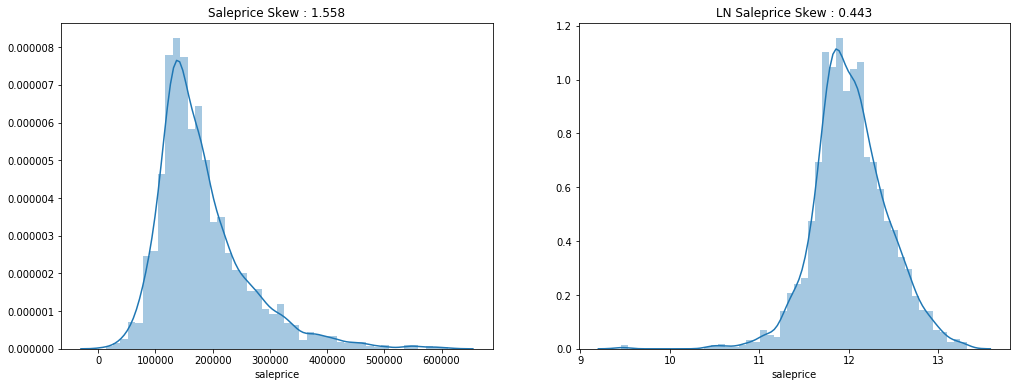

In [17]:
plt.figure(figsize = (17,6))

ax1 = plt.subplot(121)
ax1.set_title("Saleprice Skew : " + str(round(df.saleprice.skew(), 3)))
ax1.set_xlabel('Sale Price ($)')
ax1 = sns.distplot(df.saleprice);

ax2 = plt.subplot(122)
ax2.set_title("LN Saleprice Skew : " + str(round(np.log(df.saleprice.skew()), 3)))
ax2.set_xlabel('LN of Sale Price')
ax2 = sns.distplot(np.log(df.saleprice));

We can see that the saleprice has a skew greater than 1, but that taking the natural log of the saleprice reduces this substantially. Training the model of the LN of saleprice may improve its performance. 

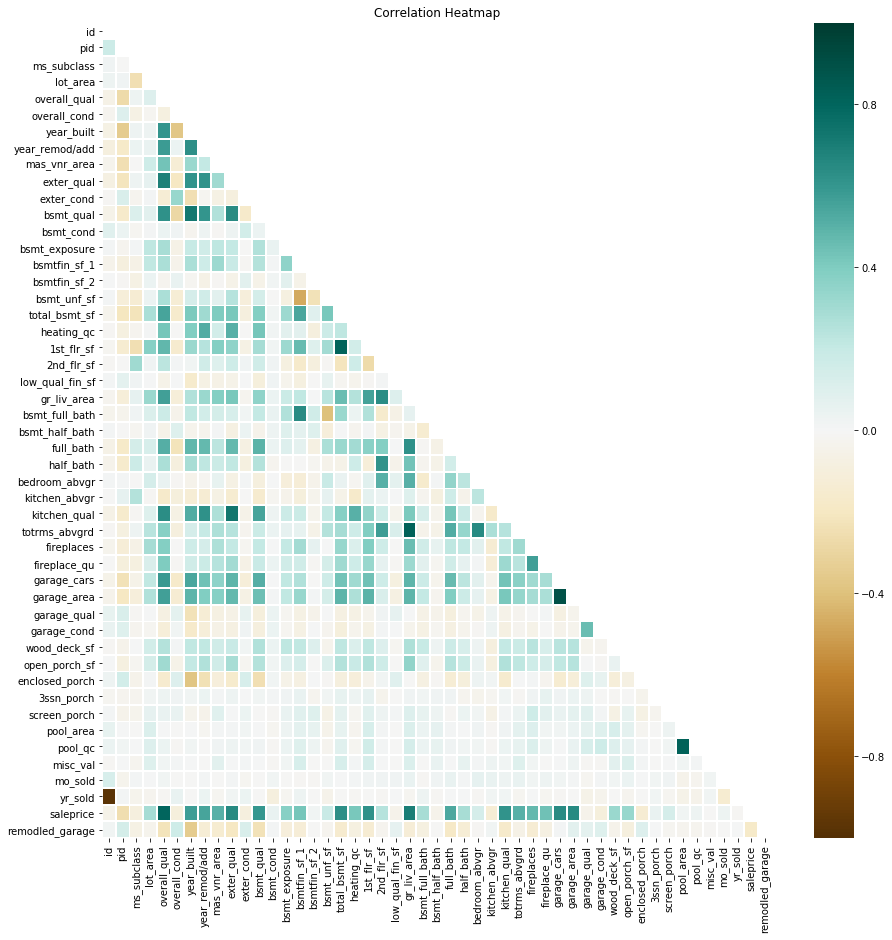

In [18]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, cmap='BrBG', linewidths=.8, vmax=1.0, vmin=-1.0).set_title('Correlation Heatmap');

From the correlation matrix we can see there is a significant amount of colinearity between the features. 

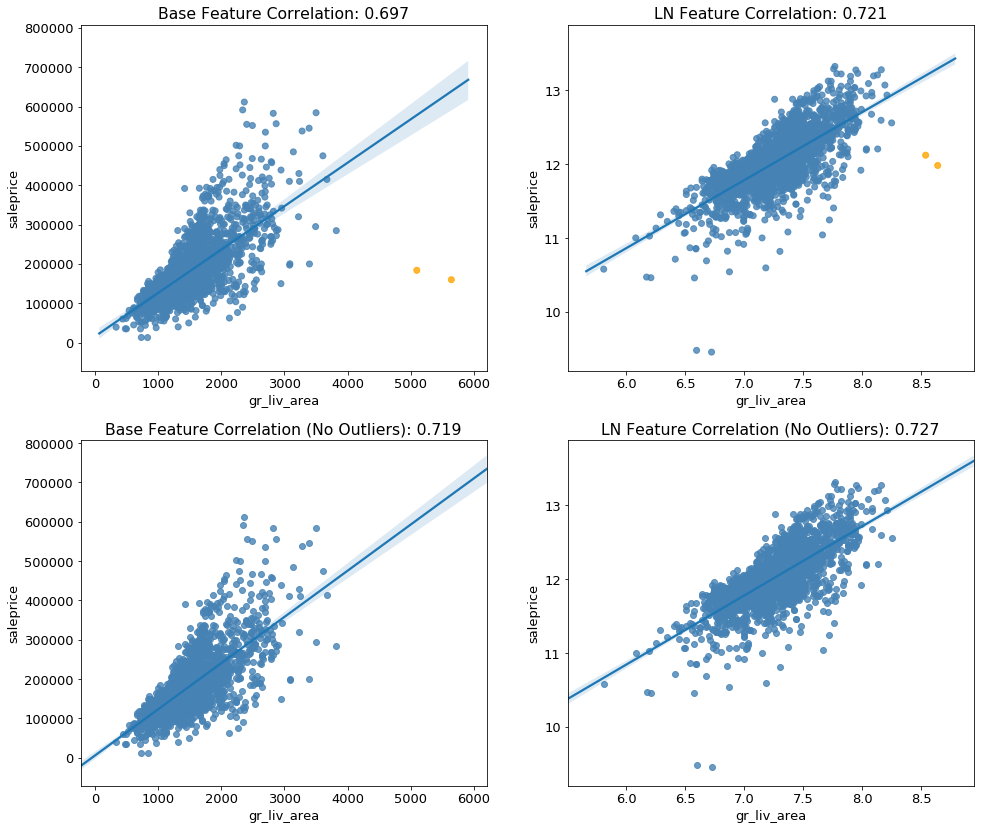

In [19]:
# Investigating Outliers

# creating a mask for outliers
outlier_mask = df.gr_liv_area < 4000

# setting figure and font sizes
plt.figure(figsize = (16,14));
plt.rcParams.update({'font.size': 13})

# creating a filter that will highlight outlier points
colors = np.where(df.gr_liv_area < 4000, 'steelblue', 'orange')

# feature correlation with outliers
ax1 = plt.subplot(221)
ax1.set_title('Base Feature Correlation: ' + str(round(df.gr_liv_area.corr(df.saleprice), 3)))
ax1.set_ylabel('Sale Price ($)')
ax1.set_xlabel('Above Ground Living Area (sf)')
ax1 = sns.regplot(df.gr_liv_area, df.saleprice, scatter_kws={'facecolors':colors,
                                                             'edgecolors': colors});
# LN of feature correlation with outliers
ax2 = plt.subplot(222)
ax2.set_title('LN Feature Correlation: ' + str(round(np.log(df.gr_liv_area).corr(np.log(df.saleprice)), 3)))
ax2.set_ylabel('LN Sale Price')
ax2.set_xlabel('Above Ground Living Area (sf)')
ax2 = sns.regplot(np.log(df.gr_liv_area), np.log(df.saleprice), scatter_kws={'facecolors':colors, 
                                                                             'edgecolors': colors});
# feature correlation without outliers
ax3 = plt.subplot(223, sharex=ax1, sharey=ax1)
ax3.set_title('Base Feature Correlation (No Outliers): ' + 
              str(round(df.gr_liv_area.loc[outlier_mask].corr(df.saleprice.loc[outlier_mask]), 3)))
ax3.set_ylabel('Sale Price ($)')
ax3.set_xlabel('Above Ground Living Area (sf)')
ax3 = sns.regplot(df.gr_liv_area.loc[outlier_mask], df.saleprice.loc[outlier_mask], 
                  scatter_kws={'facecolors':'steelblue', 
                                'edgecolors' : 'steelblue'});

# LN of feature correlation without outliers
ax4 = plt.subplot(224, sharex=ax2, sharey=ax2)
ax4.set_title('LN Feature Correlation (No Outliers): ' + 
              str(round(np.log(df.gr_liv_area.loc[outlier_mask]).corr(np.log(df.saleprice.loc[outlier_mask])), 3)))
ax4.set_ylabel('LN Sale Price')
ax4.set_xlabel('LN Above Ground Living Area')
ax4 = sns.regplot(np.log(df.gr_liv_area.loc[outlier_mask]), np.log(df.saleprice.loc[outlier_mask]), 
                  scatter_kws={'facecolors': 'steelblue', 
                               'edgecolors' : 'steelblue'});


There are two obvious outliers. Taking the LN of the the above ground living area has almost the same impact in improving the correlation with saleprice as removing the outliers. 

In [20]:
# removing outliers from data frame
df = df.loc[outlier_mask]
td = td.loc[outlier_mask]

df.reset_index(inplace=True)
td.reset_index(inplace=True)

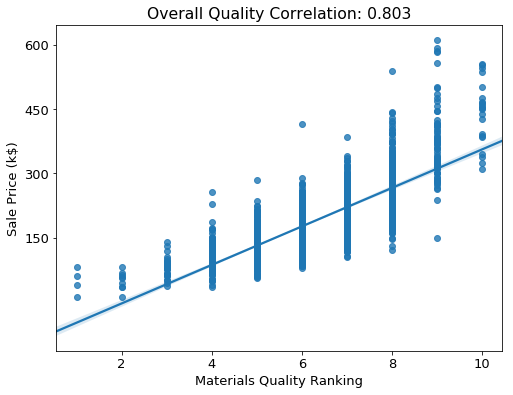

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(df.overall_qual, df.saleprice)
plt.title("Overall Quality Correlation: " + str(round(df.overall_qual.corr(df.saleprice),3)))
plt.ylabel('Sale Price (k$)')
plt.xlabel('Materials Quality Ranking')
plt.yticks([150000, 300000, 450000, 600000], labels=['150', '300', '450', '600']);

Observing the correlation of Overall Quality below. This could be set to dummy varibles but the correlation is strong so we will leave it as is.

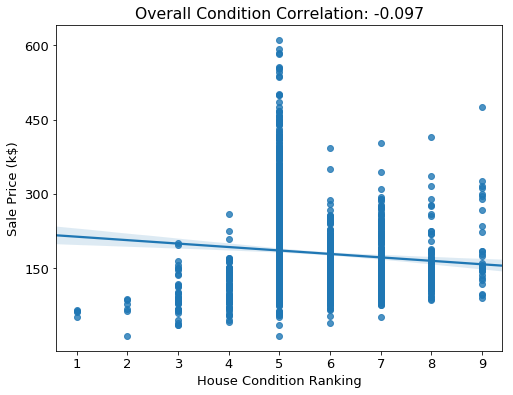

In [22]:
plt.figure(figsize=(8,6))
sns.regplot(df.overall_cond, df.saleprice)
plt.title("Overall Condition Correlation: " + str(round(df.overall_cond.corr(df.saleprice),3)))
plt.ylabel('Sale Price (k$)')
plt.xlabel('House Condition Ranking')
plt.yticks([150000, 300000, 450000, 600000], labels=['150', '300', '450', '600']);

In [23]:
df.overall_cond.value_counts()

5    1166
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

The overall condition has an unusally large number of 5's which seems to throw of the underlying positive correlation. We should be hesitant to include this feature as it is. 

# Feature Engineering

In [24]:
df['total_fin_area'] = df.gr_liv_area + df.total_bsmt_sf - df.bsmt_qual
td['total_fin_area'] = td.gr_liv_area + td.total_bsmt_sf - td.bsmt_qual

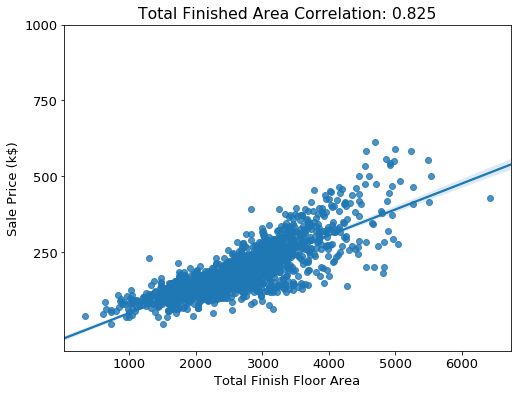

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(df.total_fin_area, df.saleprice)
plt.title("Total Finished Area Correlation: " + str(round(df.total_fin_area.corr(df.saleprice),3)))
plt.ylabel('Sale Price (k$)')
plt.xlabel('Total Finish Floor Area')
plt.yticks([250000, 500000, 750000, 1000000], labels=['250', '500', '750', '1000']);

Calculating the total finished floor area significantly improves the correlation compared to above ground living area.

In [26]:
df['total_bath'] = df.full_bath + (df.half_bath * .5) + df.bsmt_full_bath + (df.bsmt_half_bath * .5)
td['total_bath'] = td.full_bath + (td.half_bath * .5) + td.bsmt_full_bath + (td.bsmt_half_bath * .5)

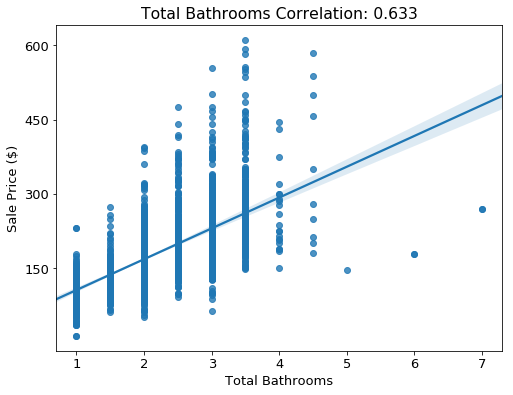

In [27]:
plt.figure(figsize=(8,6))
sns.regplot(df.total_bath, df.saleprice)
plt.title("Total Bathrooms Correlation: " + str(round(df.total_bath.corr(df.saleprice),3)))
plt.ylabel('Sale Price ($)')
plt.xlabel('Total Bathrooms')
plt.yticks([150000, 300000, 450000, 600000], labels=['150', '300', '450', '600']);

Same results for calculating the number of bathrooms.

In [28]:
#Adjusting the 'year_built' column so that it reflects the age of the house when it was sold. 
df['age'] = df.yr_sold - df.year_built
td['age'] = td.yr_sold - td.year_built
df['remodle_age'] = df['year_remod/add'] - df.year_built
td['remodle_age'] = td['year_remod/add'] - td.year_built

df.drop(['year_built', 'year_remod/add'], axis=1, inplace=True)
td.drop(['year_built', 'year_remod/add'], axis=1, inplace=True)

In [29]:
# Separating all positive or high quality featurs

# positive loations
df['positive_location'] = df.condition_1.map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)\
                        + df.condition_2.map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)

td['positive_location'] = td.condition_1.map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)\
                        + td.condition_2.map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)

# was remodeled
df['remodeled'] = df.remodle_age.map(lambda x: 1 if x > 0 else 0)
td['remodeled'] = td.remodle_age.map(lambda x: 1 if x > 0 else 0)

# new house (2000 or newer)
df['new_house'] = df.age.map(lambda x: 1 if x <= 10 else 0)
td['new_house'] = td.age.map(lambda x: 1 if x <= 10 else 0)

# quality basement
df['quality_basement'] = df.bsmtfin_type_1.map(lambda x: 1 if x == 'GLQ' else 0)
td['quality_basement'] = td.bsmtfin_type_1.map(lambda x: 1 if x == 'GLQ' else 0)

# excellent quality kitchen
df['quality_kitchen'] = df.kitchen_qual.map(lambda x: 1 if x >= 5 else 0)
td['quality_kitchen'] = td.kitchen_qual.map(lambda x: 1 if x >= 5 else 0)

# excellent quality fireplace
df['quality_fireplace'] = df.fireplace_qu.map(lambda x: 1 if x >= 4 else 0)
td['quality_fireplace'] = td.fireplace_qu.map(lambda x: 1 if x >= 4 else 0)

# built-in garage
df['builtin_garage'] = df.garage_type.map(lambda x: 1 if x == 'BuiltIn' else 0)
td['builtin_garage'] = td.garage_type.map(lambda x: 1 if x == 'BuiltIn' else 0)

# pool
df['quality_pool'] = df.pool_qc.map(lambda x: 1 if x >= 5 else 0)
td['quality_pool'] = td.pool_qc.map(lambda x: 1 if x >= 5 else 0)

# exterior condition
df['quality_exterior'] = df.exter_qual.map(lambda x: 1 if x >= 5 else 0)
td['quality_exterior'] = td.exter_qual.map(lambda x: 1 if x >= 5 else 0)

In [30]:
positive_features = ['positive_location', 'new_house', 'quality_basement', 'quality_exterior',
                     'quality_kitchen', 'quality_fireplace', 'builtin_garage', 'quality_pool']

df['positive_features'] = df[positive_features].apply(np.sum, axis=1)
td['positive_features'] = td[positive_features].apply(np.sum, axis=1)

df.drop(positive_features, axis=1, inplace=True)
td.drop(positive_features, axis=1, inplace=True)

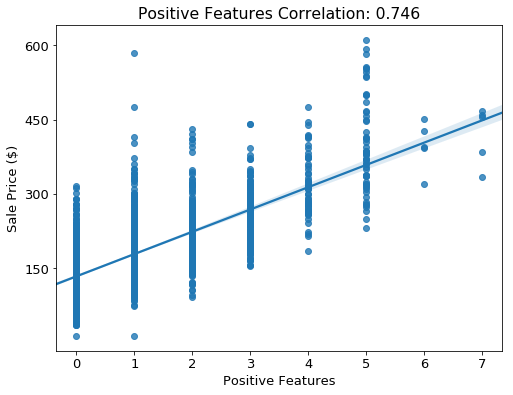

In [31]:
plt.figure(figsize=(8,6))
sns.regplot(df.positive_features, df.saleprice)
plt.title("Positive Features Correlation: " + str(round(df.positive_features.corr(df.saleprice),3)))
plt.ylabel('Sale Price ($)')
plt.xlabel('Positive Features')
plt.yticks([150000, 300000, 450000, 600000], labels=['150', '300', '450', '600']);

Individual positive features are weak predictors by themselves, summing the to produce the total number of positive features drasticall improves their correlation.


In [32]:
df.groupby('misc_feature')['misc_val'].mean()

misc_feature
Gar2    7075.000000
Othr    4333.333333
Shed     812.125000
TenC    2000.000000
none       0.000000
Name: misc_val, dtype: float64

In [33]:
# Separating all negative or poor quality featurs

# negative loations
df['negative_location'] = df.condition_1.map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)\
                        + df.condition_2.map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)

td['negative_location'] = td.condition_1.map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)\
                        + td.condition_2.map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)

poor_labels = ['Maj2', 'Sev', 'Sal']
df['damaged_home'] = df.functional.map(lambda x: 1 if x in poor_labels else 0)
td['damaged_home'] = td.functional.map(lambda x: 1 if x in poor_labels else 0)

# excellent quality kitchen
df['poor_kitchen'] = df.kitchen_qual.map(lambda x: 1 if x == 1 else 0)
td['poor_kitchen'] = td.kitchen_qual.map(lambda x: 1 if x == 1 else 0)

# pool
df['poor_pool'] = df.pool_qc.map(lambda x: 1 if x == 1 else 0)
td['poor_pool'] = td.pool_qc.map(lambda x: 1 if x == 1 else 0)

# exterior condition
df['poor_exterior'] = df.exter_qual.map(lambda x: 1 if x == 1 else 0)
td['poor_exterior'] = td.exter_qual.map(lambda x: 1 if x == 1 else 0)

# poor Heating
df['poor_HVAC'] = df.heating_qc.map(lambda x: 1 if x == 1 else 0)
td['poor_HVAC'] = td.heating_qc.map(lambda x: 1 if x == 1 else 0)

# no central air
df['no_central_air'] = df.central_air.map(lambda x: 1 if x == 'N' else 0)
td['no_central_air'] = td.central_air.map(lambda x: 1 if x == 'N' else 0)

# no garage
df['no_garage'] = df.garage_type.map(lambda x: 1 if x == 0 else 0)
td['no_garage'] = td.garage_type.map(lambda x: 1 if x == 0 else 0)

In [34]:
negative_features = ['poor_kitchen', 'poor_pool', 'poor_exterior', 'damaged_home', 'poor_HVAC', 'no_central_air', 
                    'no_garage', 'negative_location']

df['negative_features'] = df[negative_features].apply(np.sum, axis=1)
td['negative_features'] = td[negative_features].apply(np.sum, axis=1)

df.drop(negative_features, axis=1, inplace=True)
td.drop(negative_features, axis=1, inplace=True)

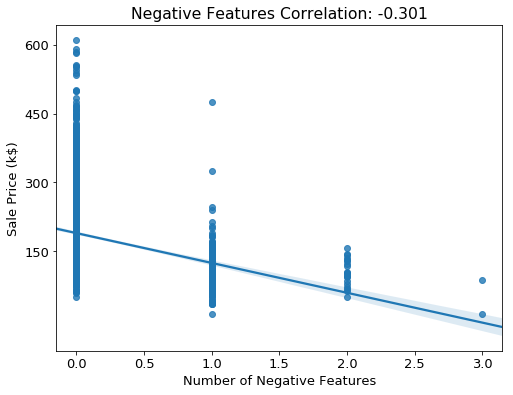

In [35]:
plt.figure(figsize=(8,6))
sns.regplot(df.negative_features, df.saleprice)
plt.title("Negative Features Correlation: " + str(round(df.negative_features.corr(df.saleprice),3)))
plt.ylabel('Sale Price (k$)')
plt.xlabel('Number of Negative Features')
plt.yticks([150000, 300000, 450000, 600000], labels=['150', '300', '450', '600']);

Same with the negative features, although it is not as strong. 

---

Retyping Data from int to object

In [36]:
retyped_columns = ['id', 'pid', 'ms_subclass', 'ms_zoning', 'mo_sold', 'yr_sold']
df[retyped_columns] = df[retyped_columns].astype(str)
td[retyped_columns] = td[retyped_columns].astype(str)

In [37]:
# function that takes a list of features and makes dummy variables
def make_dummies(columns, X_train, X_test, train_data=df, test_data=td):
    train_dummies = pd.get_dummies(data=train_data[columns], drop_first=True)
    test_dummies = pd.get_dummies(test_data[columns], drop_first=True)
    
    missing_test_columns = set(train_dummies.columns) - set(test_dummies.columns)
    for col in missing_test_columns:
        test_dummies[col] = 0
    missing_train_columns = set(test_dummies.columns) - set(train_dummies.columns)
    for col in missing_train_columns:
        train_dummies[col] = 0
        
    X_train = pd.concat([X_train, train_dummies], axis=1)
    X_test = pd.concat([X_test, test_dummies], axis=1)
    
    X_train, X_test = X_train.align(X_test, axis=1)
    
    return (X_train, X_test)

---

# Modeling

In [38]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

---

Defining functions

In [39]:
def standardize(X_train, X_test):
    ss = StandardScaler()
    X_train_sc = pd.DataFrame(ss.fit_transform(X_train))
    X_test_sc = pd.DataFrame(ss.transform(X_test))
    
    return X_train_sc, X_test_sc

In [40]:
def make_polys(features, X_train, X_test):    
    poly = PolynomialFeatures(include_bias=False)
    X_train_poly = poly.fit_transform(X_train[features])
    X_test_poly = poly.fit_transform(X_test[features])
    poly_col_names = poly.get_feature_names(features)
    X_test = pd.DataFrame(X_test_poly, columns=poly_col_names)
    X_train = pd.DataFrame(X_train_poly, columns=poly_col_names)
    
    return X_train, X_test

In [41]:
def r2_adj(model, X, y):
    y_hat = model.predict(X)
    y_bar = y.mean()
    sse = sum((y-y_hat)**2)
    smd = sum((y-y_bar)**2)
    n = len(y)
    p = len(X.columns)

    return (1 - (((1/(n-p-1))*sse) / ((1/(n-1))*smd)))

In [42]:
def cross_val(lr, lasso, X, y):
    import warnings
    warnings.filterwarnings("ignore")
    
    print('MLR:')
    print(round(cross_val_score(lr, X, y).mean(), 4))
    print(cross_val_score(lr, X, y))
    mod = lr.fit(X, y)
    print(round(r2_adj(mod, X, y), 4))
    print()
    
    print('Lasso:')
    print(round(cross_val_score(lasso, X, y).mean(), 4))
    print(cross_val_score(lasso, X, y))
    mod = lasso.fit(X, y)
    print(round(r2_adj(mod, X, y), 4))
    print()

In [43]:
def test_data(model, X, y):
    x1, x2, y1, y2 = train_test_split(X, y, random_state=42)
    model.fit(x1, y1)
    train_pred = model.predict(x1)
    test_pred = model.predict(x2)
    print('Training Results')
    print('R2: ' + str(round(model.score(x1, y1), 3)))
    print('RMSE: ' + str(round(np.sqrt(mean_squared_error(y1, train_pred)), 3)))
    print()
    print('Testing Results')
    print('R2: ' + str(round(model.score(x2, y2), 3)))
    print('RMSE: ' + str(round(np.sqrt(mean_squared_error(y2, test_pred)), 3)))

---

Targeted Model with Limited Features

In [44]:
# taking top performers
features = ['overall_qual', 
            'total_fin_area',
            'totrms_abvgrd',
            'garage_area',
            'total_bath', 
            'age', 
            'kitchen_abvgr', 
            'enclosed_porch',
            'positive_features',
            'negative_features'
            ]

X_train = df[features]
X_test = td[features]
y = df['saleprice']

In [45]:
X_train_poly, X_test_poly = make_polys(features, X_train, X_test)

In [46]:
X_train, X_test = standardize(X_train, X_test)

In [47]:
dummies = ['neighborhood', 
           'ms_zoning', 
           'house_style', 
           'bldg_type', 
           'lot_shape',
           'ms_subclass', 
           'mo_sold', 
           'functional', 
           'sale_type',
           'central_air',
           'foundation', 
           'yr_sold'
          ]

X_train, X_test = make_dummies(dummies, X_train_poly, X_test_poly)

In [48]:
# checking that shapes are the same size
print(X_train.shape, X_test.shape) 

(2049, 164) (879, 164)


In [49]:
lr = LinearRegression()
lasso = LassoCV()

In [50]:
# we'll use the MLR model here
cross_val(lr, lasso, X_train, y)

MLR:
0.9068
[0.90395243 0.90898519 0.90753286]
0.9235

Lasso:
0.8104
[0.797056   0.81008443 0.82418109]
0.7963



In [51]:
test_data(lr, X_train, y)

Training Results
R2: 0.927
RMSE: 21415.779

Testing Results
R2: 0.926
RMSE: 21594.297


In [52]:
# training final model on all of the results
model_MLR = lr.fit(X_train, y)
MLR_train_pred = model_MLR.predict(X_train)

In [53]:
model_MLR.score(X_train, y)

0.9296409713319317

In [54]:
np.sqrt(mean_squared_error(y, MLR_train_pred))

21028.326901229433

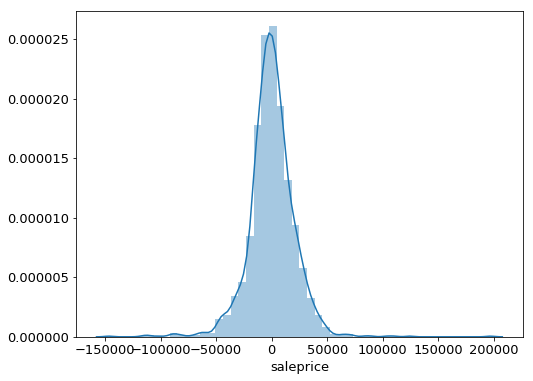

In [55]:
plt.figure(figsize=(8,6))
residuals = MLR_train_pred - y
sns.distplot(residuals);

Our residuals appear to be evenly distributed, there would be little to no benefit with using the natural log here.

---

Taking a look at some of the best predictors (note that is is expected impact on saleprece per unit, so features with a high number of units (age, square footage) will likely not show up here.

In [56]:
coef_dict = {}

for i in zip(model_MLR.coef_,X_train.columns):
    coef_dict[float(i[0])] = i[1]

In [57]:
top_positive_features = pd.Series(model_MLR.coef_).sort_values(ascending=False).head(20)

for i in top_positive_features:
    print(coef_dict[i], '---', i)

neighborhood_GrnHill --- 126519.70179916172
kitchen_abvgr --- 55495.02114550402
sale_type_Con --- 52881.72122030917
ms_subclass_45 --- 38724.575332969805
ms_subclass_40 --- 32894.1126366962
ms_subclass_70 --- 32442.883069317144
functional_Typ --- 32091.66417234125
functional_Min1 --- 30643.64068870338
ms_subclass_50 --- 28011.44876110741
ms_subclass_75 --- 27166.755604003654
functional_Min2 --- 26635.632654349793
ms_subclass_20 --- 26568.306444223297
bldg_type_2fmCon --- 26526.33411129707
sale_type_New --- 26196.410215918102
neighborhood_StoneBr --- 24171.649538984508
ms_subclass_60 --- 23851.426437645394
sale_type_Oth --- 23053.105276805367
functional_Mod --- 22311.74355730925
neighborhood_ClearCr --- 22230.245975239992
ms_subclass_30 --- 21251.266367249988


In [58]:
top_negative_features = pd.Series(model_MLR.coef_).sort_values(ascending=True).head(20)

for i in top_negative_features:
    print(coef_dict[i], '---', i)

negative_features --- -42589.43452990387
ms_subclass_150 --- -35279.941660409626
functional_Sev --- -28227.078805164005
neighborhood_MeadowV --- -16383.008745045532
kitchen_abvgr^2 --- -13795.94955639067
overall_qual --- -13543.211777136157
neighborhood_SWISU --- -12800.716625146953
house_style_1.5Unf --- -12541.350832776507
neighborhood_Somerst --- -12240.579555171158
kitchen_abvgr positive_features --- -11263.061309354243
neighborhood_OldTown --- -10864.949224229158
neighborhood_NWAmes --- -10668.938340401692
neighborhood_CollgCr --- -10549.879815864488
neighborhood_Edwards --- -10482.984703183174
neighborhood_IDOTRR --- -10335.402850310526
ms_zoning_C (all) --- -10043.416113512412
neighborhood_Landmrk --- -9208.168046203231
neighborhood_Gilbert --- -8805.994171229848
ms_subclass_180 --- -8610.89792870237
lot_shape_IR3 --- -8570.42179415669
